# Análisis y preprocesado del dataset Severance
### Importación de librerías

In [18]:
import os
import cv2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Las siguientes funciones tienen como objetivo la lectura y muestra de imágenes

In [2]:
'''
This function receives a string with the filename of the image to read,
and a flag indicating if we want to read it in color/RGB (flagColor=1) or gray level (flagColor=0)

Example of use:
im1=readIm(get_image('apple.jpg'),0)
'''


def readIm(filename, flagColor=1):
    # cv2 reads BGR format
    im = cv2.imread(filename)
    # change to  RGB and return the image
    if (flagColor):
        return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    # change from BGR to grayscale instead if flag is 0
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


'''
This function receives an array of arbitrary real numbers (that could include even negative values),
and returns an 'image' in the range [0,1].
flag_GLOBAL allows the user to normalize the whole image (including all channels) or to normalize
each channel/band independently.
'''


def rangeDisplay01(im, flag_GLOBAL=True):
    im = im.astype(float)
    if flag_GLOBAL:
        im = (im - im.min()) / (im.max() - im.min())
    else:
        # bands normalization
        for band in range(im.shape[2]):
            im[:, :, band] = (im[:, :, band] - im[:, :, band].min()) / (im[:, :, band].max() - im[:, :, band].min())
            # Note: remember that, for plt.imshow with RGB data, the valid range is [0..1] for floats and [0..255] for integers.
    return im


"""
Función para mostrar imágenes en pantalla en color y blanco negro. Permite realizar
aumento sobre las mismas para apreciar un mayor detalle.

Entrada:
    im: imagen leída en formato ndarray
    title: nombre que recibe el marco en pantalla
    factor: factor de aumento de la image, "zoom"
"""


def displayIm(im, title='Result', factor=2):
    # First normalize range
    max = np.max(im)
    min = np.min(im)
    if min < 0 or max > 255:
        im = rangeDisplay01(im, flag_GLOBAL=True)
    if len(im.shape) == 3:
        # im es tribanda
        plt.imshow(im, cmap='jet')
    else:
        # im es monobanda
        plt.imshow(im, cmap='gray')
    figure_size = plt.gcf().get_size_inches()
    plt.gcf().set_size_inches(factor * figure_size)
    plt.title(title)
    plt.xticks([]), plt.yticks([])  # eliminamos numeración
    plt.show()

### Lectura de las imágenes

In [11]:
# Lectura del csv preprocesado
df_original = pd.read_csv('metadata.csv')
# .csv procesado
#filas = get_thumbnails(df_original, img_path)
#train = pd.DataFrame(filas, columns=df_original.columns)
display(df_original)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [13]:
# Extraemos el conteo de cada clase
LABELS = list(df_original['diagnostic'].unique())
print(LABELS)

['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL']


### Tratamiento y división
Se recorren las imágenes disponibles convirtiendo su clase a una notación numérica más comoda para realizar el estudio estadístico.

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ejemplo de DataFrame con una columna 'Causa' que contiene categorías

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Transforma las categorías en valores numéricos
df_original['label_numerica'] = label_encoder.fit_transform(df_original['diagnostic'])

C:\Users\Cris1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Cris1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


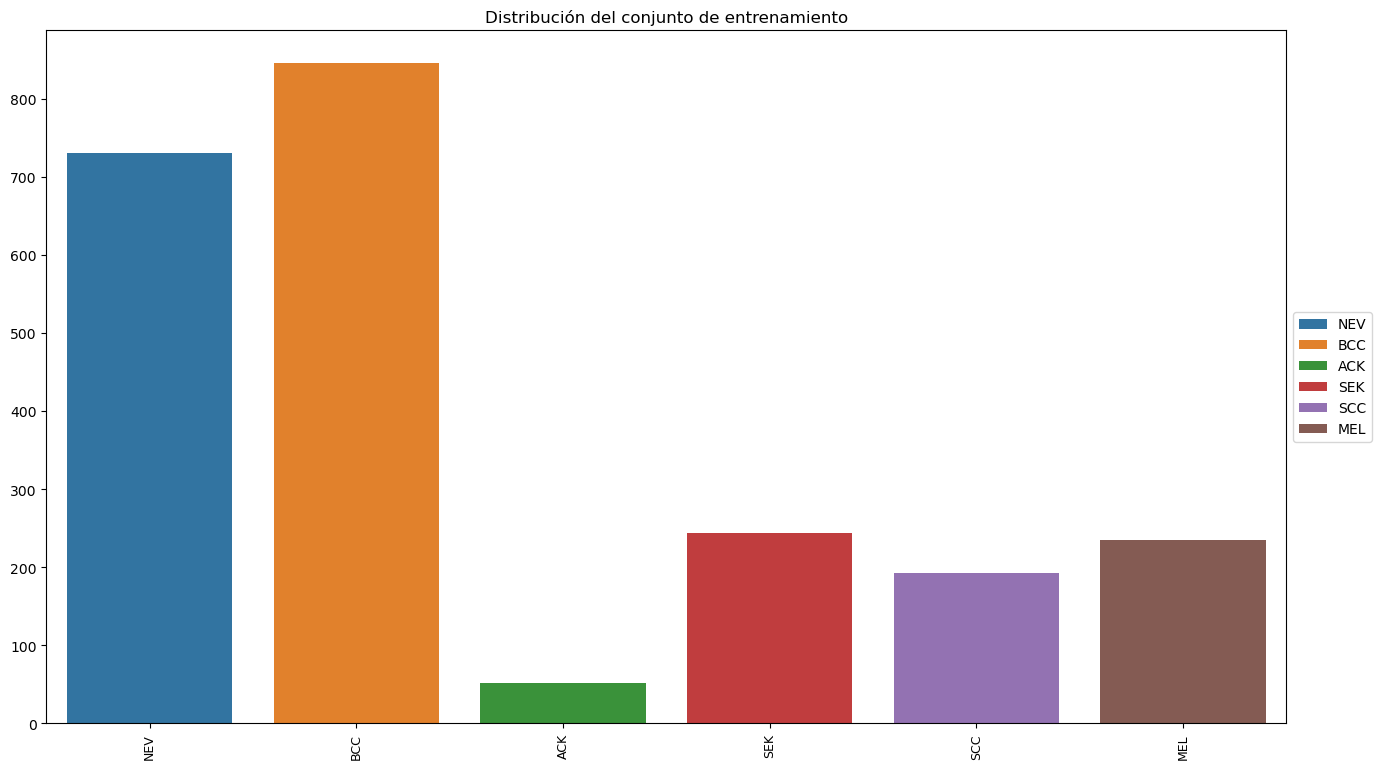

In [20]:
# Extraemos el conteo de cada clase

train_y = df_original.iloc[:,1:-1].to_numpy()

values, counts = np.unique(df_original['diagnostic'].to_numpy(), return_counts=True)

# Representamos en un gráfico de barras
plt.figure(figsize=(16,9))
plt.title("Distribución del conjunto de entrenamiento")
ax = sns.barplot(x=LABELS, y=counts, hue = LABELS, dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.show()